In [9]:
from __future__ import division, print_function
import pandas as pd
import numpy as np
pd.set_option('display.max.columns', 100)
import pylab as plt
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)
import matplotlib 
import pandas_profiling 
import mglearn

In [10]:
df = pd.read_csv('../data/telecom_churn.csv')

In [7]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [10]:
pandas_profiling.ProfileReport(df)

Number of variables,20
Number of observations,3333
Total Missing (%),0.0%
Total size in memory,498.1 KiB
Average record size in memory,153.0 B
Numeric,12
Categorical,3
Boolean,1
Date,0
Text (Unique),0
Rejected,4


In [11]:
df['Churn'] = df['Churn'].map({False:0, True:1})
df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})
df.drop(['State'], axis=1, inplace = True)

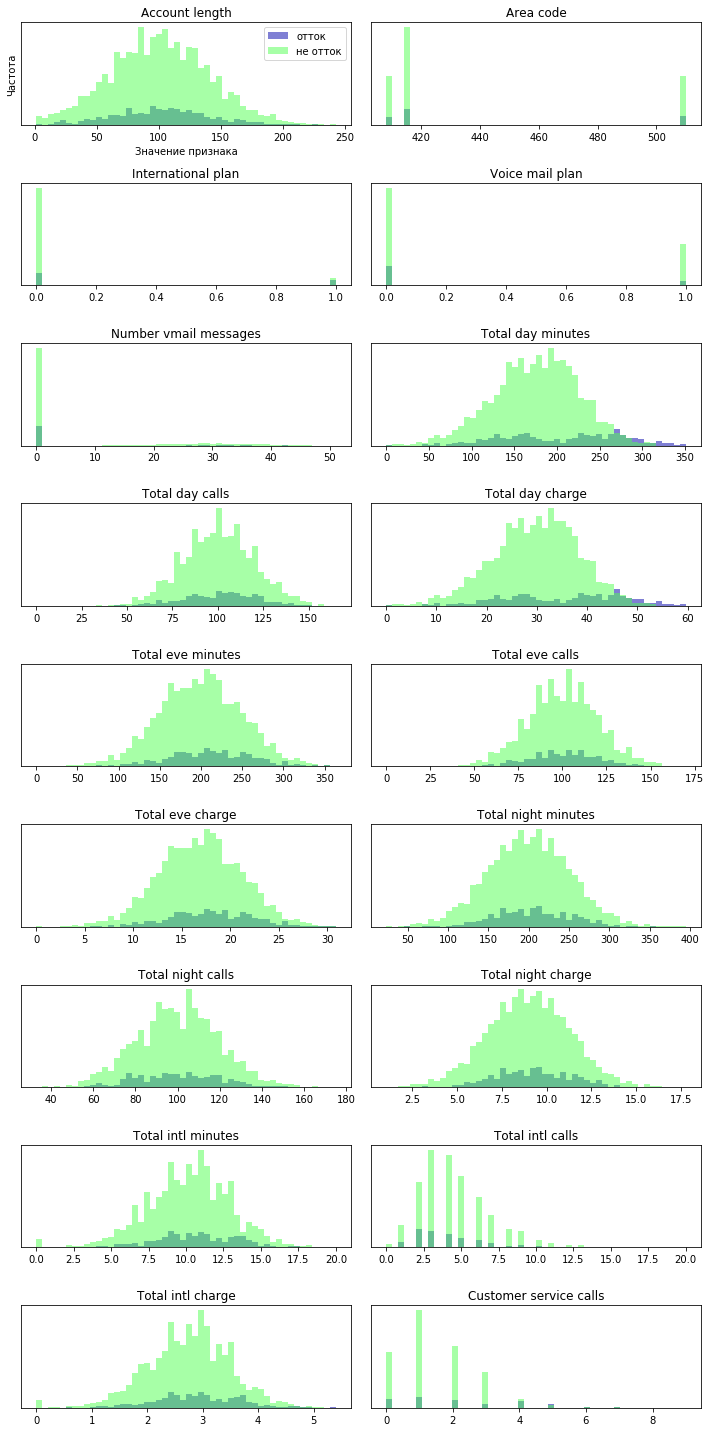

In [13]:
fig, axes = plt.subplots(9, 2, figsize=(10, 20))
churn =  df[df['Churn'] == 1]
no_churn = df[df['Churn'] == 0]
ax = axes.ravel()
for i in range(18):
    _, bins = np.histogram(df.iloc[:, i], bins=50)
    ax[i].hist(churn.iloc[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(no_churn.iloc[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(list(df.columns)[i])
    ax[i].set_yticks(())
    ax[0].set_xlabel("Значение признака")
    ax[0].set_ylabel("Частота")
ax[0].legend(["отток", "не отток"], loc="best")
fig.tight_layout()

In [55]:
# Scaling the dataset
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [57]:
X = df.drop(['Churn'], axis = 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
%time
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(X_scaled)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 10 µs


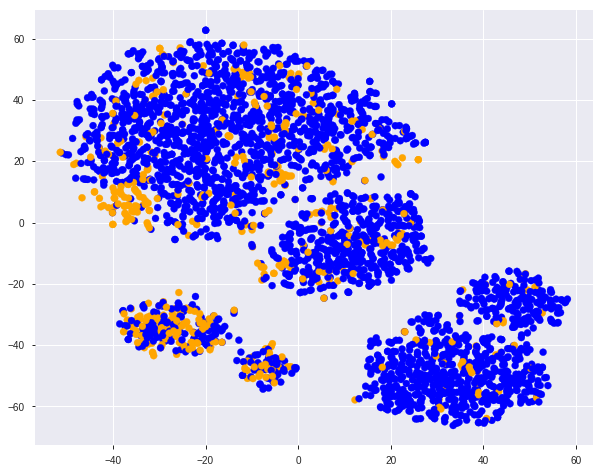

In [60]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], c=df['Churn'].map({0: 'blue', 1:'orange'}));

In [81]:
# кластеризация
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
kY = kmeans.predict(X) # .fit_predict(X)

In [82]:
kmeans.labels_

array([1, 0, 1, ..., 0, 1, 1], dtype=int32)

Text(0.5,1,'Actual clusters')

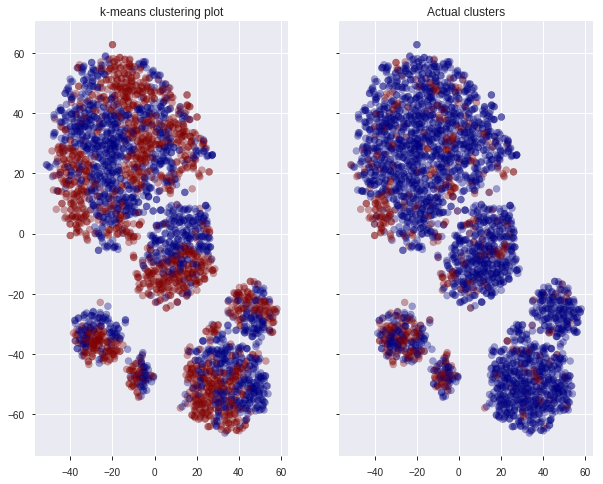

In [79]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(tsne_representation[:,0],tsne_representation[:,1],  c=kY, cmap = "jet", alpha=0.35)
ax1.set_title('k-means clustering plot')

ax2.scatter(tsne_representation[:,0],tsne_representation[:,1],  c = df['Churn'], cmap = "jet", alpha=0.35)
ax2.set_title('Actual clusters')

Text(0.5,1,'Actual clusters')

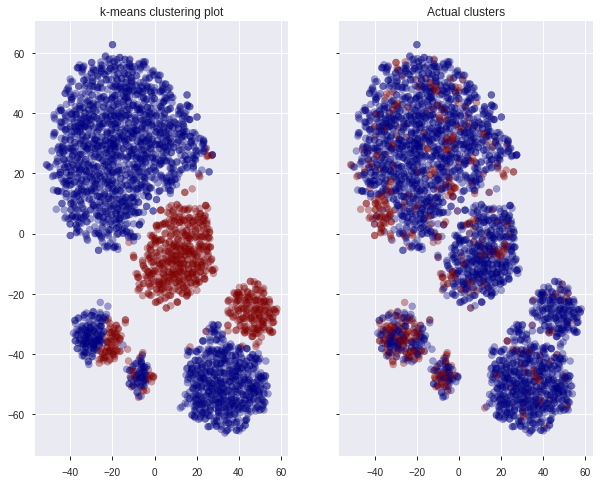

In [87]:
# Cluster using hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
aggC = AgglomerativeClustering(n_clusters=2, linkage='ward')
kY = aggC.fit_predict(X)


f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)


ax1.scatter(tsne_representation[:,0],tsne_representation[:,1],  c=kY, cmap = "jet", alpha=0.35)
ax1.set_title('k-means clustering plot')

ax2.scatter(tsne_representation[:,0],tsne_representation[:,1],  c = df['Churn'], cmap = "jet", alpha=0.35)
ax2.set_title('Actual clusters')

Text(0.5,1,'Actual clusters')

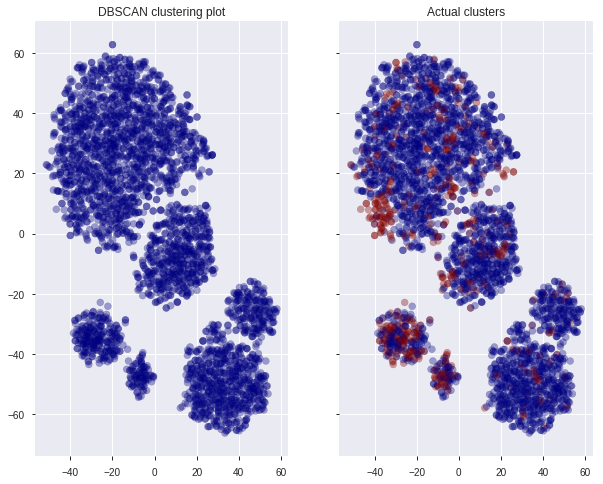

In [89]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.2, min_samples =4)
dbscanY = dbscan.fit_predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)


ax1.scatter(tsne_representation[:,0],tsne_representation[:,1],  c=dbscanY, cmap = "jet", alpha=0.35)
ax1.set_title('DBSCAN clustering plot')

ax2.scatter(tsne_representation[:,0],tsne_representation[:,1],  c = df['Churn'], cmap = "jet", alpha=0.35)
ax2.set_title('Actual clusters')